In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('data/raw/NBA_2017/games-november.csv')
df = df.drop(['Notes', 'Box Score'], axis=1)

df['Day'] = df['Date'].str.split(' ').str[0]

day_di = {'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6, 'Sat': 7}
df['Day_Num'] = df['Date'].str.split(' ').str[0]
df['Day_Num'].replace(day_di, inplace=True)

df.head(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num
0,Tue Nov 01 2016 06:00pm,Houston Rockets,120,Cleveland Cavaliers,128,0,20562,Tue,3
1,Tue Nov 01 2016 07:30pm,New York Knicks,89,Detroit Pistons,102,0,13087,Tue,3
2,Tue Nov 01 2016 07:00pm,Los Angeles Lakers,108,Indiana Pacers,115,0,15348,Tue,3
3,Tue Nov 01 2016 07:30pm,Sacramento Kings,96,Miami Heat,108,1,19612,Tue,3
4,Tue Nov 01 2016 08:00pm,Memphis Grizzlies,80,Minnesota Timberwolves,116,0,14774,Tue,3
5,Tue Nov 01 2016 08:00pm,Milwaukee Bucks,117,New Orleans Pelicans,113,0,15515,Tue,3
6,Tue Nov 01 2016 07:00pm,Orlando Magic,103,Philadelphia 76ers,101,0,12529,Tue,3
7,Tue Nov 01 2016 10:00pm,Golden State Warriors,127,Portland Trail Blazers,104,0,19393,Tue,3
8,Tue Nov 01 2016 08:30pm,Utah Jazz,106,San Antonio Spurs,91,0,18418,Tue,3
9,Wed Nov 02 2016 07:30pm,Los Angeles Lakers,123,Atlanta Hawks,116,0,13800,Wed,4


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
time_dif = df['Date'][20] - df['Date'][1]
print(time_dif)

2 days 03:00:00


In [4]:
df['Spread'] = df['Home_PTS'] - df['Visitor_PTS']
df.head(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread
0,2016-11-01 18:00:00,Houston Rockets,120,Cleveland Cavaliers,128,0,20562,Tue,3,8
1,2016-11-01 19:30:00,New York Knicks,89,Detroit Pistons,102,0,13087,Tue,3,13
2,2016-11-01 19:00:00,Los Angeles Lakers,108,Indiana Pacers,115,0,15348,Tue,3,7
3,2016-11-01 19:30:00,Sacramento Kings,96,Miami Heat,108,1,19612,Tue,3,12
4,2016-11-01 20:00:00,Memphis Grizzlies,80,Minnesota Timberwolves,116,0,14774,Tue,3,36
5,2016-11-01 20:00:00,Milwaukee Bucks,117,New Orleans Pelicans,113,0,15515,Tue,3,-4
6,2016-11-01 19:00:00,Orlando Magic,103,Philadelphia 76ers,101,0,12529,Tue,3,-2
7,2016-11-01 22:00:00,Golden State Warriors,127,Portland Trail Blazers,104,0,19393,Tue,3,-23
8,2016-11-01 20:30:00,Utah Jazz,106,San Antonio Spurs,91,0,18418,Tue,3,-15
9,2016-11-02 19:30:00,Los Angeles Lakers,123,Atlanta Hawks,116,0,13800,Wed,4,-7


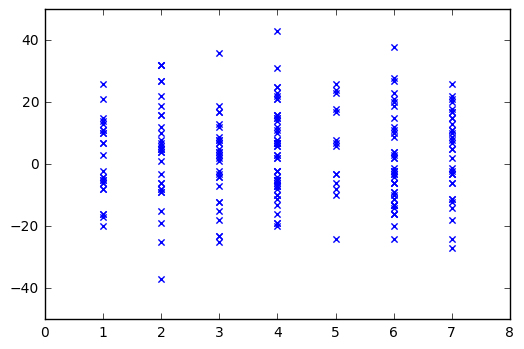

In [5]:
x = df['Day_Num'].tolist()
y = df['Spread'].tolist()

plt.scatter(x, y, c='b', marker='x', label='Spread')
plt.show()

In [6]:
df['Winner'] = df['Spread'] > 0

winner_di = {True: 1, False: 0}
df['Winner'].replace(winner_di, inplace=True)

df.head(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread,Winner
0,2016-11-01 18:00:00,Houston Rockets,120,Cleveland Cavaliers,128,0,20562,Tue,3,8,True
1,2016-11-01 19:30:00,New York Knicks,89,Detroit Pistons,102,0,13087,Tue,3,13,True
2,2016-11-01 19:00:00,Los Angeles Lakers,108,Indiana Pacers,115,0,15348,Tue,3,7,True
3,2016-11-01 19:30:00,Sacramento Kings,96,Miami Heat,108,1,19612,Tue,3,12,True
4,2016-11-01 20:00:00,Memphis Grizzlies,80,Minnesota Timberwolves,116,0,14774,Tue,3,36,True
5,2016-11-01 20:00:00,Milwaukee Bucks,117,New Orleans Pelicans,113,0,15515,Tue,3,-4,False
6,2016-11-01 19:00:00,Orlando Magic,103,Philadelphia 76ers,101,0,12529,Tue,3,-2,False
7,2016-11-01 22:00:00,Golden State Warriors,127,Portland Trail Blazers,104,0,19393,Tue,3,-23,False
8,2016-11-01 20:30:00,Utah Jazz,106,San Antonio Spurs,91,0,18418,Tue,3,-15,False
9,2016-11-02 19:30:00,Los Angeles Lakers,123,Atlanta Hawks,116,0,13800,Wed,4,-7,False


In [7]:
win_totals = df['Winner'].value_counts()
num_games = len(df)
print(win_totals/num_games)

True     0.550218
False    0.449782
Name: Winner, dtype: float64


In [8]:
played_games = df['Spread'].count()
df_p = df.iloc[:played_games, :]
df_u = df.iloc[played_games:, :]
df_u.head()

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread,Winner


In [9]:
df.groupby('Visitor', as_index=False)['Visitor_PTS'].mean()

,Visitor,Visitor_PTS
0,Atlanta Hawks,95.000000
1,Boston Celtics,105.125000
2,Brooklyn Nets,105.500000
3,Charlotte Hornets,106.333333
4,Chicago Bulls,102.200000
5,Cleveland Cavaliers,102.600000
6,Dallas Mavericks,89.125000
7,Denver Nuggets,103.714286
8,Detroit Pistons,97.900000
9,Golden State Warriors,116.625000


In [10]:
df.groupby('Home', as_index=False)['Home_PTS'].mean()

,Home,Home_PTS
0,Atlanta Hawks,110.166667
1,Boston Celtics,103.428571
2,Brooklyn Nets,108.000000
3,Charlotte Hornets,105.111111
4,Chicago Bulls,103.000000
5,Cleveland Cavaliers,119.000000
6,Dallas Mavericks,87.833333
7,Denver Nuggets,108.625000
8,Detroit Pistons,101.714286
9,Golden State Warriors,122.285714


In [11]:
df.groupby('Visitor', as_index=False)['Spread'].mean()

,Visitor,Spread
0,Atlanta Hawks,-7.000000
1,Boston Celtics,-9.000000
2,Charlotte Bobcats,0.857143
3,Chicago Bulls,-0.625000
4,Cleveland Cavaliers,5.571429
5,Dallas Mavericks,-6.000000
6,Denver Nuggets,2.333333
7,Detroit Pistons,6.857143
8,Golden State Warriors,7.000000
9,Houston Rockets,5.750000


In [11]:
cols = ['Date', 'Day', 'Day_Num', 'Home', 'Visitor', 'Home_PTS', 'Visitor_PTS', 'Spread', '#OTs', 'Winner']
df = df[cols]
df.head()

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner
0,2016-11-01 18:00:00,Tue,3,Cleveland Cavaliers,Houston Rockets,128,120,8,0,True
1,2016-11-01 19:30:00,Tue,3,Detroit Pistons,New York Knicks,102,89,13,0,True
2,2016-11-01 19:00:00,Tue,3,Indiana Pacers,Los Angeles Lakers,115,108,7,0,True
3,2016-11-01 19:30:00,Tue,3,Miami Heat,Sacramento Kings,108,96,12,1,True
4,2016-11-01 20:00:00,Tue,3,Minnesota Timberwolves,Memphis Grizzlies,116,80,36,0,True


In [38]:
df['Home_TotalWins'] = 0
df['Home_TotalLosses'] = 0
df['Home_HomeWins'] = 0
df['Home_HomeLosses'] = 0
df['Home_Streak'] = 0
df['Home_CumSpread'] = 0
df['Home_AvgSpread'] = 0
df['Visitor_TotalWins'] = 0
df['Visitor_TotalLosses'] = 0
df['Visitor_VisitorWins'] = 0
df['Visitor_VisitorLosses'] = 0
df['Visitor_Streak'] = 0
df['Visitor_CumSpread'] = 0
df['Visitor_AvgSpread'] = 0

In [43]:
for index, row in df.iterrows():
    #checking for if there are any previous games up to the index value for the home team
    if ((df[:index]['Home']==row['Home']) | (df[:index]['Visitor']==row['Home'])).any():
        #getting the idx of the home team's last home game
        try:
            last_home_idx = df[:index].loc[df['Home']==row['Home']].index[-1]
            
            #updating home team's home record
            if df.loc[last_home_idx, 'Winner'] == 1:
                df.loc[index, 'Home_HomeWins'] = df.loc[last_home_idx, 'Home_HomeWins'] + 1
                df.loc[index, 'Home_HomeLosses'] = df.loc[last_home_idx, 'Home_HomeLosses']
            else:
                df.loc[index, 'Home_HomeWins'] = df.loc[last_home_idx, 'Home_HomeWins']
                df.loc[index, 'Home_HomeLosses'] = df.loc[last_home_idx, 'Home_HomeLosses'] + 1
        except IndexError:
            last_home_idx = -1
        
        #getting the idx of the home team's last visitor game
        try:
            last_visitor_idx = df[:index].loc[df['Visitor']==row['Home']].index[-1]
        except IndexError:
            last_visitor_idx = -1
        
        #checking if the home team's last game was an away or home game
        if last_home_idx > last_visitor_idx:
            #updating record when last game was home game
            prev_index = last_home_idx
            if df.loc[prev_index, 'Winner'] == 1:
                df.loc[index, 'Home_TotalWins'] = df.loc[prev_index, 'Home_TotalWins'] + 1
                df.loc[index, 'Home_TotalLosses'] = df.loc[prev_index, 'Home_TotalLosses']
                
                #updating streak
                if df.loc[prev_index, 'Home_Streak'] >= 0:
                    df.loc[index, 'Home_Streak'] = df.loc[prev_index, 'Home_Streak'] + 1
                else:
                    df.loc[index, 'Home_Streak'] = 1
                    
            else:
                df.loc[index, 'Home_TotalWins'] = df.loc[prev_index, 'Home_TotalWins']
                df.loc[index, 'Home_TotalLosses'] = df.loc[prev_index, 'Home_TotalLosses'] + 1
                
                #updating streak
                if df.loc[prev_index, 'Home_Streak'] <= 0:
                    df.loc[index, 'Home_Streak'] = df.loc[prev_index, 'Home_Streak'] - 1
                else:
                    df.loc[index, 'Home_Streak'] = -1
            
            #updating spread for home team
            df.loc[index, 'Home_CumSpread'] = df.loc[prev_index, 'Home_CumSpread'] + df.loc[prev_index, 'Spread']
                    
        else:
            #updating record when last game was away game
            prev_index = last_visitor_idx
            if df.loc[prev_index, 'Winner'] == 0:
                df.loc[index, 'Home_TotalWins'] = df.loc[prev_index, 'Visitor_TotalWins'] + 1
                df.loc[index, 'Home_TotalLosses'] = df.loc[prev_index, 'Visitor_TotalLosses']
                
                #updating streak
                if df.loc[prev_index, 'Visitor_Streak'] >= 0:
                    df.loc[index, 'Home_Streak'] = df.loc[prev_index, 'Visitor_Streak'] + 1
                else:
                    df.loc[index, 'Home_Streak'] = 1
                    
            else:
                df.loc[index, 'Home_TotalWins'] = df.loc[prev_index, 'Visitor_TotalWins']
                df.loc[index, 'Home_TotalLosses'] = df.loc[prev_index, 'Visitor_TotalLosses'] + 1
                
                #updating streak
                if df.loc[prev_index, 'Visitor_Streak'] <= 0:
                    df.loc[index, 'Home_Streak'] = df.loc[prev_index, 'Visitor_Streak'] - 1
                else:
                    df.loc[index, 'Home_Streak'] = -1
                
            #updating spread for home team
            df.loc[index, 'Home_CumSpread'] = df.loc[prev_index, 'Visitor_CumSpread'] - df.loc[prev_index, 'Spread']
        
    #checking for if there are any previous games up to the index value for the visitor team    
    if ((df[:index]['Home']==row['Visitor']) | (df[:index]['Visitor']==row['Visitor'])).any():   
        
        #getting the index of the visitor's last home game
        try:
            last_home_idx = df[:index].loc[df['Home']==row['Visitor']].index[-1]
        except IndexError:
            last_home_idx = -1
            
        #getting the index of the visitor's last away game
        try:
            last_visitor_idx = df[:index].loc[df['Visitor']==row['Visitor']].index[-1]
            
            #updating the visiting team's visitor record
            if df.loc[last_visitor_idx, 'Winner'] == 0:
                df.loc[index, 'Visitor_VisitorWins'] = df.loc[last_visitor_idx, 'Visitor_VisitorWins'] + 1
                df.loc[index, 'Visitor_VisitorLosses'] = df.loc[last_visitor_idx, 'Visitor_VisitorLosses']
            else:
                df.loc[index, 'Visitor_VisitorWins'] = df.loc[last_visitor_idx, 'Visitor_VisitorWins'] 
                df.loc[index, 'Visitor_VisitorLosses'] = df.loc[last_visitor_idx, 'Visitor_VisitorLosses'] + 1
            
        except IndexError:
            last_visitor_idx = -1
            
        #checking if the visitor team's last game was an away or home game
        if last_home_idx > last_visitor_idx:
            #updating record when last game was home game
            prev_index = last_home_idx
            if df.loc[prev_index, 'Winner'] == 1:
                df.loc[index, 'Visitor_TotalWins'] = df.loc[prev_index, 'Home_TotalWins'] + 1
                df.loc[index, 'Visitor_TotalLosses'] = df.loc[prev_index, 'Home_TotalLosses']
                
                #updating streak
                if df.loc[prev_index, 'Home_Streak'] >= 0:
                    df.loc[index, 'Visitor_Streak'] = df.loc[prev_index, 'Home_Streak'] + 1
                else:
                    df.loc[index, 'Visitor_Streak'] = 1
                
            else:
                df.loc[index, 'Visitor_TotalWins'] = df.loc[prev_index, 'Home_TotalWins']
                df.loc[index, 'Visitor_TotalLosses'] = df.loc[prev_index, 'Home_TotalLosses'] + 1
                
                #updating streak
                if df.loc[prev_index, 'Home_Streak'] <= 0:
                    df.loc[index, 'Visitor_Streak'] = df.loc[prev_index, 'Home_Streak'] - 1
                else:
                    df.loc[index, 'Visitor_Streak'] = -1
            
            #updating spread for visitor team
            df.loc[index, 'Visitor_CumSpread'] = df.loc[prev_index, 'Home_CumSpread'] + df.loc[prev_index, 'Spread']
            
        else:
            #updating record when last game was away game
            prev_index = last_visitor_idx
            if df.loc[prev_index, 'Winner'] == 0:
                df.loc[index, 'Visitor_TotalWins'] = df.loc[prev_index, 'Visitor_TotalWins'] + 1
                df.loc[index, 'Visitor_TotalLosses'] = df.loc[prev_index, 'Visitor_TotalLosses']
                
                #updating streak
                if df.loc[prev_index, 'Visitor_Streak'] >= 0:
                    df.loc[index, 'Visitor_Streak'] = df.loc[prev_index, 'Visitor_Streak'] + 1
                else:
                    df.loc[index, 'Visitor_Streak'] = 1
                
            else:
                df.loc[index, 'Visitor_TotalWins'] = df.loc[prev_index, 'Visitor_TotalWins']
                df.loc[index, 'Visitor_TotalLosses'] = df.loc[prev_index, 'Visitor_TotalLosses'] + 1
                
                #updating streak
                if df.loc[prev_index, 'Visitor_Streak'] <= 0:
                    df.loc[index, 'Visitor_Streak'] = df.loc[prev_index, 'Visitor_Streak'] - 1
                else:
                    df.loc[index, 'Visitor_Streak'] = -1
            
            #updating spread for visitor team
            df.loc[index, 'Visitor_CumSpread'] = df.loc[prev_index, 'Visitor_CumSpread'] - df.loc[prev_index, 'Spread']        

In [42]:
df['Home_GamesPlayed'] = df['Home_TotalWins'] + df['Home_TotalLosses']
df['Visitor_GamesPlayed'] = df['Visitor_TotalWins'] + df['Visitor_TotalLosses']

In [52]:
df['Home_AvgSpread'] = df['Home_CumSpread'] / df['Home_GamesPlayed']
df['Visitor_AvgSpread'] = df['Visitor_CumSpread'] / df['Visitor_GamesPlayed']
df['Home_AvgSpread'] = df['Home_AvgSpread'].fillna(0)
df['Visitor_AvgSpread'] = df['Visitor_AvgSpread'].fillna(0)

In [53]:
cols = ['Home', 'Visitor', 'Winner', 'Spread', 'Home_AvgSpread', 'Home_CumSpread', 'Visitor_AvgSpread', 'Visitor_CumSpread','Home_GamesPlayed', 'Visitor_GamesPlayed']
team = 'Utah Jazz'
df[cols].loc[(df['Visitor']==team) | (df['Home']==team)]

,Home,Visitor,Winner,Spread,Home_AvgSpread,Home_CumSpread,Visitor_AvgSpread,Visitor_CumSpread,Home_GamesPlayed,Visitor_GamesPlayed
8,San Antonio Spurs,Utah Jazz,False,-15,0.000000,0,0.000000,0,0,0
17,Utah Jazz,Dallas Mavericks,True,16,15.000000,15,0.000000,0,1,0
31,Utah Jazz,San Antonio Spurs,False,-14,15.500000,31,-15.000000,-15,2,1
45,New York Knicks,Utah Jazz,False,-5,-6.333333,-19,5.666667,17,3,3
52,Philadelphia 76ers,Utah Jazz,False,-25,-6.333333,-19,5.500000,22,3,4
61,Charlotte Hornets,Utah Jazz,True,6,14.000000,42,9.400000,47,3,5
78,Orlando Magic,Utah Jazz,False,-13,-7.200000,-36,6.833333,41,5,6
88,Miami Heat,Utah Jazz,False,-11,-3.000000,-12,7.714286,54,4,7
106,Utah Jazz,Memphis Grizzlies,False,-6,8.125000,65,-9.333333,-56,8,6
126,Utah Jazz,Chicago Bulls,False,-8,6.555556,59,3.250000,26,9,8


In [19]:
df[df['Home_Streak'] == df['Home_Streak'].min()]['Home']

200    Dallas Mavericks
Name: Home, dtype: object

In [48]:
df.tail(50)

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner,...,Visitor_TotalLosses,Visitor_VisitorWins,Visitor_VisitorLosses,Visitor_Streak,Home_AvgSpread,Visitor_AvgSpread,Home_CumSpread,Visitor_CumSpread,Home_GamesPlayed,Visitor_GamesPlayed
179,2016-11-25 13:00:00,Fri,6,Boston Celtics,San Antonio Spurs,103,109,-6,0,False,...,3,5,0,7,0.916667,1.545455,11,17,12,11
180,2016-11-25 19:30:00,Fri,6,Cleveland Cavaliers,Dallas Mavericks,128,90,38,0,True,...,9,1,6,-7,5.800000,-8.727273,58,-96,10,11
181,2016-11-25 21:00:00,Fri,6,Denver Nuggets,Oklahoma City Thunder,129,132,-3,1,False,...,8,1,4,-3,-2.916667,-1.692308,-35,-22,12,13
182,2016-11-25 19:30:00,Fri,6,Detroit Pistons,Los Angeles Clippers,108,97,11,0,True,...,2,6,0,4,-0.615385,13.923077,-8,181,13,13
183,2016-11-25 20:00:00,Fri,6,Indiana Pacers,Brooklyn Nets,118,97,21,0,True,...,7,1,4,-5,-4.153846,-8.000000,-54,-80,13,10
184,2016-11-25 22:30:00,Fri,6,Los Angeles Lakers,Golden State Warriors,85,109,-24,0,False,...,1,6,1,9,-1.615385,16.833333,-21,202,13,12
185,2016-11-25 20:00:00,Fri,6,Memphis Grizzlies,Miami Heat,81,90,-9,0,False,...,8,1,5,-2,1.000000,-3.090909,12,-34,12,11
186,2016-11-25 20:00:00,Fri,6,Milwaukee Bucks,Toronto Raptors,99,105,-6,0,False,...,5,5,3,1,1.200000,2.583333,12,31,10,12
187,2016-11-25 19:30:00,Fri,6,New York Knicks,Charlotte Hornets,113,111,2,1,True,...,5,2,2,-3,-1.916667,2.272727,-23,25,12,11
188,2016-11-25 19:00:00,Fri,6,Orlando Magic,Washington Wizards,91,94,-3,0,False,...,7,0,3,1,-5.000000,-1.090909,-60,-12,12,11


In [55]:
df[df['Home_AvgSpread'] == df['Home_AvgSpread'].max()]

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner,...,Visitor_TotalLosses,Visitor_VisitorWins,Visitor_VisitorLosses,Visitor_Streak,Home_AvgSpread,Visitor_AvgSpread,Home_CumSpread,Visitor_CumSpread,Home_GamesPlayed,Visitor_GamesPlayed
22,2016-11-03 20:00:00,Thu,5,Minnesota Timberwolves,Denver Nuggets,99,102,-3,0,False,...,0,0,0,0,36.0,0.0,36,0,1,0
